In [7]:
import sys
from pathlib import Path

# Aggiungi il percorso corretto al modulo src
sys.path.append(str(Path.cwd().parent / 'src'))

from model.efficient_frontier.markowitz_optimizer import MarkowitzOptimizer
from model.postprocessing.visualizer import Visualizer


ModuleNotFoundError: No module named 'src'

In [2]:
# Configurazione perscorsi
#DATA_PATH = Path('../data/processed/returns.csv')
DATA_PATH = Path('../data/raw')
OUTPUT_PATH = Path('../results')
OUTPUT_PATH.mkdir(exist_ok=True)

In [3]:
def load_and_preprocess_data(data_path: Path) -> pd.DataFrame:
    """Carica e prepara i dati storici"""
    stocks = ['AAPL', 'GOOGL', 'MSFT']
    
    # Leggi e combina i CSV
    dfs = []
    for ticker in stocks:
        df = pd.read_csv(
            data_path / f"{ticker}.csv",
            parse_dates=['Date'],
            usecols=['Date', 'Close'],
            index_col='Date'
        )
        df.columns = [ticker]
        dfs.append(df)
    
    combined = pd.concat(dfs, axis=1)
    return combined.ffill().dropna()

prices = load_and_preprocess_data(DATA_PATH)
prices.head(10)

,AAPL,GOOGL,MSFT
Date,,,
2020-01-02,72.716064,68.108376,153.323288
2020-01-03,72.009125,67.752075,151.414093
2020-01-06,72.582916,69.557945,151.805496
2020-01-07,72.241547,69.423592,150.421371
2020-01-08,73.403648,69.917725,152.817322
2020-01-09,74.962791,70.651718,154.726501
2020-01-10,75.132271,71.108025,154.010559
2020-01-13,76.737419,71.658897,155.862427
2020-01-14,75.701218,71.189148,154.764709


Text(0.5, 1.0, 'Distribuzione dei rendimenti')

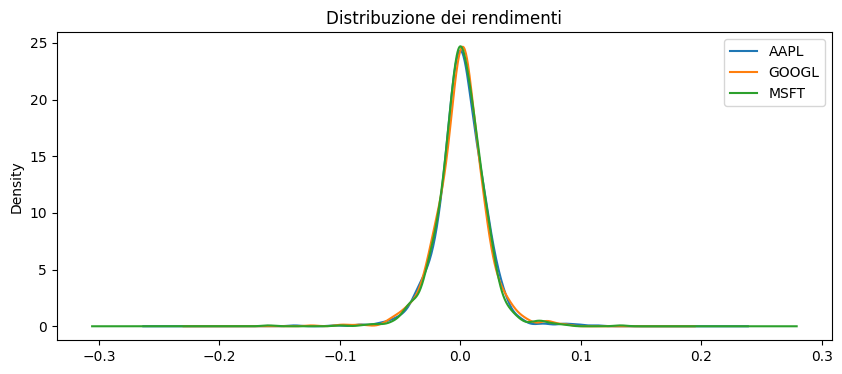

In [4]:
returns = np.log(prices / prices.shift(1)).dropna()
returns.plot(kind='kde', figsize=(10, 4))
plt.title('Distribuzione dei rendimenti')

In [5]:
optimizer = MarkowitzOptimizer(returns=returns)
frontier = optimizer.efficient_frontier()
#sharpes = optimizer.max_sharpe_ratio()

NameError: name 'MarkowitzOptimizer' is not defined

In [6]:
viz = Visualizer(optimizer)

# Genera grafici
viz.plot_efficient_frontier(OUTPUT_DIR / 'frontiera_notebook.png')
viz.plot_weights_distribution(
    dict(zip(returns.columns, sharpe_portfolio['weights'])),
    OUTPUT_DIR / 'allocazione_notebook.png'
)

# Mostra anteprima inline
plt.figure(figsize=(12, 5))
plt.subplot(121)
viz.plot_efficient_frontier()
plt.subplot(122)
viz.plot_weights_distribution(dict(zip(returns.columns, sharpe_portfolio['weights'])))
plt.tight_layout();

NameError: name 'Visualizer' is not defined